# Tutorial 2.1: Intrusion Detection System

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Under_Construction&color=orange)


**Open notebook on:** 
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/clandolt/mlcysec_notebooks/blob/main/source/tutorial_notebooks/tutorial2_anomaly_detection/tutorial2_anomaly_detection.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/clandolt/mlcysec_notebooks/blob/main/source/tutorial_notebooks/tutorial2_anomaly_detection/tutorial2_anomaly_detection.ipynb)   
**Author:** Christoph R. Landolt


In cybersecurity, we often face the problem that we don’t have enough labeled attack data to train machine learning models for classifying network traffic.
This has two main reasons:
1. Labeling data is costly.
2. Many attack patterns are unknown, not included in the training set, or related to vulnerabilities that have not yet been discovered.

In this tutorial, we’ll take a look at how to train machine learning models to detect anomalies in network data and flag these anomalies as potential attacks.

## Tutorial Objectives
By the end of this tutorial, you will be able to:
After completing this section, you will be able to:
- Understand the role of Intrusion Detection Systems (IDS) in network security.
- Differentiate between Host-Based and Network-Based IDS.
- Explain how anomaly-based and signature-based detection techniques work.
- Describe real-world deployment strategies of hybrid IDS setups.
- Apply **anomaly detection** algorithms to identify new attack patterns.

## What is an Intrusion Detection System?
An **Intrusion Detection System (IDS)** is designed to protect IT systems by enabling the **early detection of attacks** on computer networks.  
In addition, an IDS helps collect information about **new types of attacks**, which can be used to improve the **preventive protection** of computer networks.

Intrusion Detection Systems (IDS) are often divided into **host-based IDS** and **network-based IDS** according to the type of audit data and into **anomaly-based** and **signature-based** according to the analysis technique.

| Classification Basis | Type | Description |
|----------------------|------|--------------|
| **Source of Data** | Host-Based (HIDS) | Monitors logs, file integrity, and system events on individual hosts. |
|                      | Network-Based (NIDS) | Monitors network traffic and analyzes packets moving through the network. |
| **Detection Method** | Signature-Based | Detects known attack patterns or signatures. |
|                      | Anomaly-Based | Learns normal behavior and identifies deviations as potential intrusions. |

### Host-Based Intrusion Detection System (HIDS)
A HIDS monitors the security status of individual systems or hosts.
These agents, often referred to as sensors, are typically installed on nodes that are considered vulnerable to potential attacks. Since a HIDS is limited to monitoring a single host, a separate instance must be deployed on each device. It collects data about security-related events, usually provided by the operating system through audit trails. These logs contain information about the objects involved in an event, enabling the system to determine which process, program, or user may have caused a security breach.

### Network-Based Intrusion Detection System (NIDS)
A NIDS collects its information from the network itself rather than from individual hosts.  
It operates on an **interception basis**, capturing and analyzing data as it moves through a particular network segment.  
The IDS checks for attacks or irregular behavior by examining the content and header information of packets moving through the network.  
In the case of encrypted traffic, only the **header and metadata** of the packets can be analyzed. For unencrypted traffic, many modern NIDS employ **Deep Packet Inspection (DPI)** to enhance detection capabilities. DPI goes beyond simply checking headers and metadata; it analyzes the **protocol fields and the actual payload** of packets.

By examining both the structure and content of network traffic, DPI can:
- Identify malicious or suspicious payloads in protocols such as HTTP, FTP, DNS, and SMTP.
- Detect anomalies in packet sequences or unusual protocol usage.
- Enforce security policies, such as blocking specific commands or suspicious patterns.

DPI allows NIDS to **detect attacks that might bypass simple signature-based inspection**, providing more granular visibility into network activity, while encrypted traffic remains limited to header and metadata analysis unless decrypted.

Placing the sensors of a pure NIDS at **network transition points** (such as gateways or DMZ boundaries) is a proven technique in practice:

<img src="./Network_Based_IDS.jpg" alt="Network_Based_IDS" width="600"/>

Network sensors have the advantage of being able to monitor large volumes of traffic and efficiently observe entire network zones.  
However, NIDS cannot inspect the contents of encrypted connections.  
As a result, attackers may transmit malicious content over encrypted protocols such as **HTTPS**.  
To mitigate this limitation, it is often advisable to identify **critical systems** and install host-based IDS agents on them:

<img src="./Host_Based_IDS.jpg" alt="Host_Based_IDS" width="600"/>

### Combining HIDS and NIDS
A pure HIDS deployment provides detailed host-level insights but lacks visibility into network-wide activity.  
Contrarily, a pure NIDS can detect traffic anomalies but cannot see events occurring within individual systems.  
For this reason, **a combination of both HIDS and NIDS** is commonly used in practice: NIDS monitors overall network traffic, while HIDS protects the most critical systems.

<img src="./IDS-Configuration.jpg" alt="IDS-Configuration" width="600"/>

## Anomaly Detection: Handling Rare and Diverse Attacks
In real-world network security, attacks are often **rare, diverse, and unknown**. Unlike normal traffic, malicious behavior may appear in small quantities and differ significantly from each other. This presents challenges for traditional signature-based detection systems, which rely on known patterns.

Anomaly detection approaches aim to **learn the normal behavior of a system** and flag deviations as potential attacks. These anomalies can indicate previously unseen attack types or unexpected misuse.

### Types of Malicious Behavior

Some common categories of anomalous or malicious network behavior include:
- **Probing / Reconnaissance:** Scanning networks, ports, or services to gather information about potential targets.  
- **Unauthorized Access Attempts:** Attempts to log in or gain privileges without proper authorization.  
- **Data Exfiltration:** Moving sensitive data outside the network without permission.  
- **Denial of Service (DoS / DDoS):** Overloading resources to disrupt service availability.  
- **Malware Communication:** Abnormal traffic generated by infected hosts communicating with command-and-control servers.  
- **Payload Attacks:** Injection of malicious content, such as SQL injection, XSS, or buffer overflows.  
- **Configuration Exploits:** Attempts to exploit misconfigurations, weak permissions, or default credentials.  
- **Policy Violations:** Actions that do not follow the normal behavior of users or applications, e.g., uploading unexpected file types or sending unusually large requests.  

By detecting these anomalous behaviors, **anomaly-based IDS** can complement signature-based systems, helping identify both known and previously unseen threats.  

#### Intruder Behaviour Patterns
Intruders can be divided into three groups:
- **Hackers:** They hack into computers for the thrill.
- **Criminals:** A criminal has a specific target in mind.
- **Insider Attacks:** Insiders can be motivated by revenge or money. They are challenging to detect and have valuable knowledge and access to the systems or to the company network.
- **State actors:** This group has considerable human and financial resources and often pursues geostrategic and military objectives through cyber espionage, disinformation campaigns,and cyber-attacks.

#### The Cyber Kill Chain

Lockheed Martin's Cyber Kill Chain© framework outlines attacker behavior and detection opportunities:

1. **Reconnaissance:** Identifying targets and exposed internet-facing servers.
2. **Weaponization:** Coupling malware with an exploit to create a deliverable.
3. **Delivery:** Sending malware to the target (e.g., email, web, USB).
4. **Exploitation:** Triggering the exploit to gain access; unknown exploits are “zero-day” attacks.
5. **Installation:** Deploying persistent backdoors to maintain long-term access.
6. **Command and Control (C2):** Remote management of compromised systems.
7. **Actions on Objectives:** Internal reconnaissance, lateral movement, and data exfiltration.

<img src="./life_cycle_of_advanced_targeted_attacks.jpg" alt="IDS-Configuration" width="600"/>


#### Advanced Targeted Attacks (ATA) and Advanced Persistent Threats (APT)

While many attacks, such as probing or DoS attempts, are common and often automated, some threats are far more **sophisticated, rare, and highly targeted**.  
These are categorized as **Advanced Targeted Attacks (ATA)** and **Advanced Persistent Threats (APT)**.

> **Definition – Advanced Targeted Attack (ATA):**  
> An ATA is a deliberate, goal-oriented operation against a specific organization, system, or individual.  
> ATAs are custom-tailored to exploit particular vulnerabilities and often combine multiple techniques such as reconnaissance, privilege escalation, and data exfiltration.
> Their behavior can often be modeled using an **Attack Graph (AG)**, which represents the logical sequence of steps and dependencies an attacker may follow to achieve a goal.  
> Attack Graphs help visualize how multiple vulnerabilities and system states can be chained together in complex attack paths, supporting the identification of potential weak points and early detection opportunities.

> **Definition – Advanced Persistent Threat (APT):**  
> An APT is a **long-term**, sophisticated intrusion in which attackers establish and maintain unauthorized access within a network over an extended period.  
> APT actors use **advanced concealment techniques**, such as rootkits, fileless malware, and living-off-the-land tactics, along with social engineering and custom-built malware, to **remain hidden** while continuously gathering intelligence or exfiltrating sensitive information.

ATAs and APTs differ from typical network intrusions in both **frequency** and **complexity**.  
They occur far less often but are much harder to detect because their activities often blend into normal network traffic and user behavior.  
Traditional signature-based detection systems usually fail to recognize these attacks, as they rely on known indicators of compromise (IOCs) that ATAs and APTs deliberately avoid.

This is where **anomaly-based detection** becomes crucial.  
By learning what constitutes *normal behavior* within a network, **anomaly detection models** can identify small, unusual deviations that may indicate the early stages of an ATA or APT campaign.  
Detecting such anomalies early in the **Cyber Kill Chain** can prevent escalation and significantly reduce the impact of advanced attacks.


#### The Importance of Early Detection

Early detection is critical for minimizing the impact of cyber attacks such as worms, ransomware, or other self-propagating malware.  
Detecting threats before they reach their **rapid growth phase** can prevent large-scale infections, data loss, and network downtime.

The figure below illustrates different **worm propagation curves** and the importance of the **detection window**:

- **Early Detection Window:** The ideal phase for identifying and containing a threat. At this point, only diagnostic variants (initial infections or early forms of the worm) are active, and containment is highly effective.  
- **Critical Detection Window:** A short time before exponential growth, where delayed detection still prevents total network compromise but requires more intensive mitigation.  
- **Rapid Growth Phase:** The worm spreads quickly across the network, making containment difficult and costly.  
- **Saturation Phase:** The attack reaches its peak; most vulnerable systems are compromised.

The three curves represent how detection timing affects propagation:

- **Normal Propagation Curve:** Represents uncontrolled worm spread without early detection.  
- **Delayed Propagation Curve:** Detection occurs later, slowing but not fully stopping the infection.  
- **Intercepted Propagation Curve:** Early detection effectively halts the spread before reaching the critical growth phase.

<img src="./worm_propagation_model.jpg" alt="IDS-Configuration" width="600"/>

In practice, IDS that identify anomalies during the *early detection window* play a vital role in preventing outbreaks before they can escalate.


## ML-Based Anomaly Detection

In **Tutorial 1**, we trained **Machine Learning (ML)** classifiers using *supervised learning* techniques.

> **Definition – Supervised Learning**  
> In a **supervised learning** problem, the task **T** is to learn a mapping $f: X \rightarrow Y$ from inputs $x \in X$ to outputs $y \in Y$, where:
> - $x$: the input, also called **features**  
> - $y$: the output, also called the **label** or **response**
> The experience **E** is provided in the form of an *N-dimensional training set* of input–output pairs:
> $D = \{(x_n, y_n)\}_{n=1}^N$
>
> The **performance measure P** depends on the type of output. For many problems, the **Mean Squared Error (MSE)** is commonly used as the performance metric.


We also explored **pattern identification** using *unsupervised ML techniques*.

> **Definition – Unsupervised Learning:**  
> Unsupervised learning attempts to make sense of data without predefined labels.  
> Only the inputs  
> $D = \{x_n : n = 1, \ldots, N\}$  
> are considered, without the corresponding outputs $y_n$.

From a **probabilistic perspective**, unsupervised learning can be viewed as fitting an *unconditional model* of the form $p(x)$. This model describes the data distribution and can be used to **generate new data** $x$ or to **detect anomalies** by identifying observations that deviate from the learned normal pattern.


### Application in Cybersecurity

In cybersecurity, **supervised ML methods** are useful when labeled datasets are available — for example, for:
- **Malware classification**
- **Spam detection**
- **Intrusion detection with labeled attack data**

However, labeled attack data are often scarce or incomplete.  
In such cases, **unsupervised learning** techniques are applied in:
- **Network traffic analysis**
- **Anomaly detection**
- **Digital forensics**
- **Threat hunting**  

By using unsupervised learning methods to identify patterns in data (as explored in Tutorial 1), analysts often had to **manually interpret** the discovered clusters or structures to spot abnormal behavior.

In this tutorial, we will focus on a special class of unsupervised learning techniques known as **anomaly detection**.  
These models **do not require labeled data** for training; instead, they rely on the **inherent structure of the data** to isolate and identify anomalous observations that differ significantly from the normal pattern.

## Isolation Forest

To illustrate the advantage of anomaly detection algorithms for IDS, we're working again with the [KDDCUP99 dataset](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html), which you are familiar with from Tutorial 1.

In this example, we'll use an **Isolation Forest**, a data anomaly detection algorithm based on binary trees. It has linear time complexity and low memory usage, which makes it suitable for high-volume anomaly detection, such as in network traffic to detect potential cyber attacks. The algorithm is based on the assumption that anomalies (in our case, cyber attacks) are few and different from normal data, so they can be isolated using few partitions.

**Mathematical Idea:** <br>
Isolation Forest isolates points by recursively partitioning the data using random splits. For a dataset of $n$ points $\{x_1, ..., x_n\}$, the **path length** $h(x)$ of a point $x$ is the number of edges traversed from the root of a tree until $x$ is isolated in a leaf node.  

An estimate of the **anomaly score** for a given instance $x$ is:

$$
s(x, n) = 2^{-\frac{E(h(x))}{c(n)}}
$$

where:  

- $h(x)$: path length of $x$ in a single tree.  
- $E(h(x))$: average path length of $x$ across all trees in the forest.  
- $c(n)$: normalization factor, the expected path length of a point in a tree of size $n$, defined piecewise as:

$$
c(n) =
\begin{cases} 
2 H(n-1) - \frac{2(n-1)}{n} & \text{for } n > 2 \\[1mm]
1 & \text{for } n = 2 \\[1mm]
0 & \text{otherwise}
\end{cases}
$$

- $H(i)$: the $i$-th harmonic number, $H(i) = 1 + \frac12 + \frac13 + \dots + \frac{1}{i}$.  
- $n$: the number of points in the subsample used to build each tree.

**Intuition:**  

- The normalization by $c(n)$ ensures the anomaly score is **independent of tree size**.  
- The harmonic number appears because $c(n)$ represents the **expected path length of a point in a random binary search tree**; it grows roughly like $\ln(n)$ for large $n$ and provides a reference for “normal” path lengths.  
- Anomalies are isolated in **shorter paths**, so they get **higher scores**.  
- Normal points take longer to isolate, giving **lower scores**.  

**Notes:**

- **Isolation Forest** isolates anomalies instead of modeling normal points.  
- Trees are built using random feature splits on random subsamples.  
- Higher scores ($s(x, n) \to 1$) indicate likely outliers.  
- Requires specifying the number of trees and subsample size.



We start by loading the required libraries for this lab:

In [92]:
### Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample



#### Step 1: Load and Explore the KDDCUP99 Dataset


First, we'll load the `SA` subset of the **KDDCUP99 dataset** to keep computation manageable. Then we'll explore and visualize the data.

10065 datapoints with 338 anomalies (3.36%)


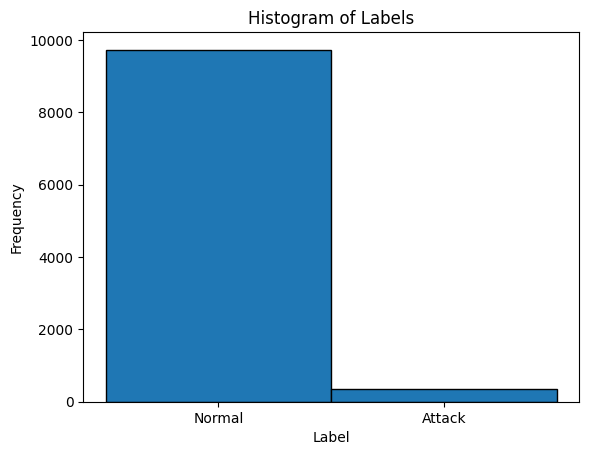

In [93]:

# ### Step 1: Load and Explore the KDDCUP99 Dataset
X, y = datasets.fetch_kddcup99(
    subset="SA",             # Use the 'SA' subset (smaller sample)
    percent10=True,          # Use 10% of the full dataset for efficiency
    random_state=42,         # Ensure reproducibility
    return_X_y=True,         # Return data and labels separately
    as_frame=True            # Load as pandas DataFrame
)

# Convert binary label: 1 = attack, 0 = normal
y = (y != b"normal.").astype(np.int32)

# Take only 10% of the data for quick demonstration
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

# Display dataset stats
n_samples, anomaly_frac = X.shape[0], y.mean()
print(f"{n_samples} datapoints with {y.sum()} anomalies ({anomaly_frac:.02%})")

# Plot label distribution
plt.hist(y, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.title('Histogram of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()


**Notes:**
- The histogram provides a visual overview of **class imbalance** in the dataset. In the KDDCUP99 subset, normal traffic far outnumbers attack events.  
- This imbalance is **typical in cybersecurity datasets**, reflecting real-world conditions where attacks are rare relative to benign activity.  
- From a theoretical perspective, Intrusion Detection Systems (IDS) face two main challenges in such imbalanced environments:
  1. **Scarcity of labeled attack data**: Many attack patterns are unknown, costly to label, or represent vulnerabilities not yet exploited.  
  2. **Diversity of attack types**: Attacks can range from common automated probes to sophisticated Advanced Persistent Threats (APT) and Advanced Targeted Attacks (ATA), which occur rarely and blend into normal traffic.
- Therefore, the observed class imbalance in the histogram **justifies the use of unsupervised anomaly detection models** (such as Isolation Forest), which do not rely on balanced labeled datasets but exploit the intrinsic structure of the data to detect deviations.

#### Step 2: Data Preprocessing

Before training, categorical (non-numeric) features must be converted into numerical form.
We’ll use **one-hot encoding** with `pandas.get_dummies()`.


In [94]:
# Convert categorical variables to numerical format
X = pd.get_dummies(X)

print(f"Feature matrix shape after encoding: {X.shape}")
X.head()


Feature matrix shape after encoding: (10065, 6536)


,duration_0,duration_1,duration_2,duration_3,duration_4,duration_5,duration_6,duration_7,duration_8,duration_9,...,dst_host_srv_rerror_rate_0.91,dst_host_srv_rerror_rate_0.92,dst_host_srv_rerror_rate_0.93,dst_host_srv_rerror_rate_0.94,dst_host_srv_rerror_rate_0.95,dst_host_srv_rerror_rate_0.96,dst_host_srv_rerror_rate_0.97,dst_host_srv_rerror_rate_0.98,dst_host_srv_rerror_rate_0.99,dst_host_srv_rerror_rate_1.0
26890,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35471,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37027,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80164,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73649,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Notes:**
- Many columns in KDDCUP99 are categorical (e.g., protocol type, service, flag).
- One-hot encoding converts these categories into binary vectors, making them compatible with ML models.


### Step 3: Train-Test Split

We split the dataset into **training (80%)** and **testing (20%)** subsets.


In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Keep only normal samples in the training set
X_train = X_train[y_train == 0]
print(f"Training only on normal points: {len(X_train)} samples")
print("Testing samples:", len(X_test))


Training only on normal points: 7784 samples
Testing samples: 2013


#### Step 4: Model Training – Isolation Forest

We use **Isolation Forest**, a classic unsupervised anomaly detection algorithm.  
It identifies unusual data points (potential attacks) by isolating them in a decision tree ensemble.


In [96]:
# Train Isolation Forest for anomaly detection
clf = IsolationForest(contamination=0.04, random_state=42, n_estimators=200, max_samples='auto', bootstrap=True)
clf.fit(X_train)


,n_estimators,200
,max_samples,'auto'
,contamination,0.04
,max_features,1.0
,bootstrap,True
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


**Notes:**
- `contamination` specifies the expected proportion of anomalies in the dataset. Here, `0.04` means the model assumes roughly 4% of the data are anomalous.
- `n_estimators` controls the number of trees in the forest; more trees improve stability but increase computation.
- `max_samples='auto'` lets the algorithm use all training samples for each tree (or a default value if too large).
- `bootstrap=True` enables sampling with replacement when building trees, which can improve robustness.


#### Step 5: Visualize the Decision Boundary (2D PCA)


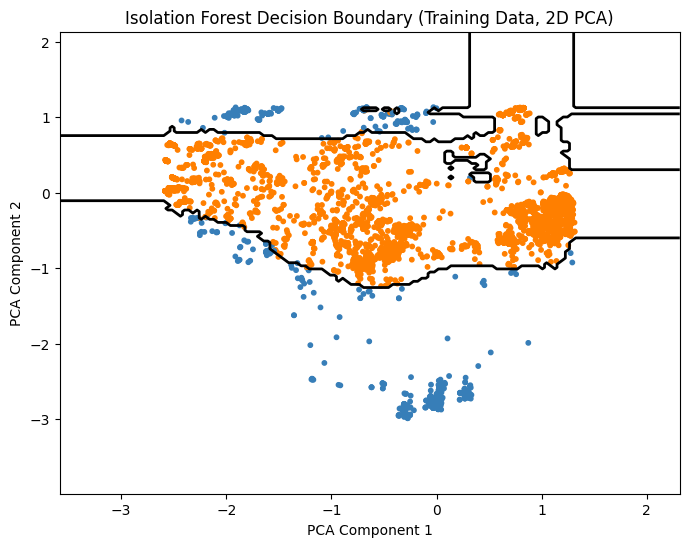

In [97]:
# Reduce features to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train)

# Retrain Isolation Forest on 2D data
clf_2d = IsolationForest(contamination=0.1, random_state=42)
clf_2d.fit(X_train_2d)

# Create a meshgrid for plotting
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:,0].min()-1, X_train_2d[:,0].max()+1, 150),
    np.linspace(X_train_2d[:,1].min()-1, X_train_2d[:,1].max()+1, 150)
)

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Plot training points
y_pred_train = clf_2d.predict(X_train_2d)
colors = np.array(["#377eb8", "#ff7f00"])  # Blue: normal, Orange: anomaly
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], s=10, color=colors[(y_pred_train + 1)//2])

plt.title("Isolation Forest Decision Boundary (Training Data, 2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

**Notes:**
- PCA reduces features to 2D for visualization only.
- Contour line shows boundary between normal points and anomalies.
- Blue points are considered normal, orange are predicted anomalies.

#### Step 6: Make Predictions and Evaluate the Model


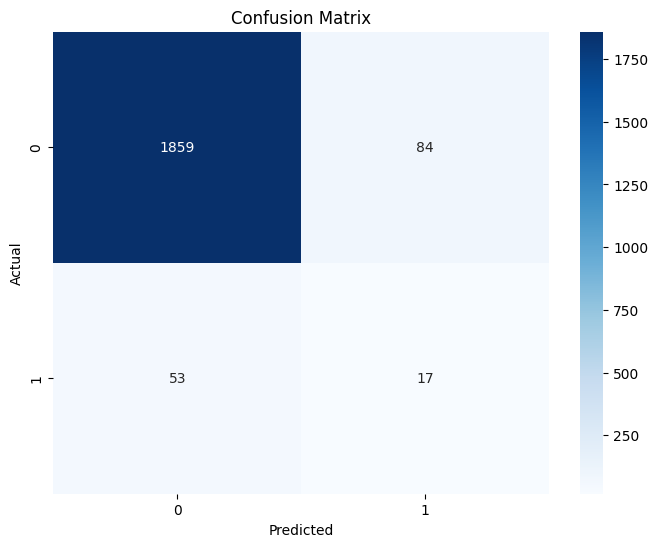

Accuracy: 93.19%


In [98]:
# Predict outliers in the test set
y_pred = clf.predict(X_test)

# Convert predictions to binary format (0 = normal, 1 = anomaly)
# The isolation forest outputs -1 for anomalies and 1 for normal points
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute accuracy
acc = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {acc:.2%}")


**Notes:**
- The confusion matrix shows **true positives**, **false positives**, **true negatives**, and **false negatives**.
- A perfect model would have all predictions along the diagonal.
- Since this is an anomaly detection model, some misclassifications are expected.


## Robust Covariance

While **Isolation Forest** isolates anomalies without assuming a particular data distribution, another approach is to explicitly model the structure of normal data and detect points that deviate from it. For this, we continue working with the [KDDCUP99 dataset](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html).  

In this example, we'll use **Robust Covariance estimation**, specifically the **EllipticEnvelope** method. This approach models the central location and covariance of the data assuming a Gaussian distribution, but it is **robust to outliers**, making it suitable for detecting rare anomalies in network traffic. The parameter `contamination` allows specifying the expected proportion of outliers, helping the algorithm distinguish normal behavior from anomalies.  

### What is Robust Covariance?

**Robust Covariance** estimates the mean and covariance of a dataset in a way that is **resistant to outliers**. Unlike classical covariance, which can be heavily influenced by extreme values, robust covariance captures the “core structure” of the data, representing where most points lie. This is particularly useful in anomaly detection, where outliers should **not distort the model of normal behavior**.  

### Why is it called EllipticEnvelope?

The method is called **EllipticEnvelope** because it effectively fits an **elliptical boundary** around the bulk of the data in feature space:

- If the data were perfectly Gaussian, the contour of constant Mahalanobis distance would form an ellipse (or ellipsoid in higher dimensions).  
- The algorithm estimates a robust mean and covariance matrix, then considers the **ellipse that contains most of the data** as the “normal region.”  
- Points outside this ellipse are flagged as anomalies.  

In short: **EllipticEnvelope = robust estimation of an elliptical region that encloses normal points**. It is “robust” because extreme points (outliers) do not pull the ellipse away from the core data.  

### Mathematical Idea

EllipticEnvelope computes the **Mahalanobis distance** for each point \(x\):

$$
D_M(x) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
$$

- $x$: a data point  
- $\mu$: estimated robust mean  
- $\Sigma$: estimated robust covariance  

Points with a Mahalanobis distance above a threshold derived from the contamination fraction are considered **anomalies**.  

### Intuition

- Robust covariance ensures the mean and covariance estimates are **not overly influenced by outliers**.  
- Points far from the “elliptical envelope” formed by the bulk of the data are **flagged as outliers**.  
- Useful when normal data roughly follows a Gaussian distribution but occasional anomalies occur.  

### Notes

- Requires specifying `contamination`, the expected fraction of outliers.  
- Random state can be set for reproducibility.  
- Works best for moderate-dimensional data and assumes roughly **elliptical clusters** for normal data.  

We start by loading the required libraries for this example:


### Step 1: Model Training – EllipticEnvelope
We use **EllipticEnvelope**, a robust covariance-based anomaly detection method.  
It models the core data distribution with a robust mean and covariance, then identifies points that fall outside the estimated elliptical region as anomalies.


In [99]:
# Subsample 10000 points
X_train_sub = resample(X_train, n_samples=10000, random_state=42)
# Apply PCA to reduce to 10 dimensions for better performance -> EllipticEnvelope is computationally expensive
X_train_sub_pca = PCA(n_components=10).fit_transform(X_train_sub)
# Train EllipticEnvelope for anomaly detection
outliers_fraction = 0.04  # expected fraction of anomalies
clf = EllipticEnvelope(contamination=outliers_fraction, random_state=42)
clf.fit(X_train_sub_pca)

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.04
,random_state,42


**Notes:**
- `contamination` specifies the expected proportion of outliers.
- Robust covariance ensures the estimated ellipse is not distorted by extreme points.
- Points outside the elliptical envelope are flagged as anomalies.

### Step 2: Visualize the Decision Boundary (2D PCA)

We reduce features to 2D using PCA and visualize the elliptical boundary.

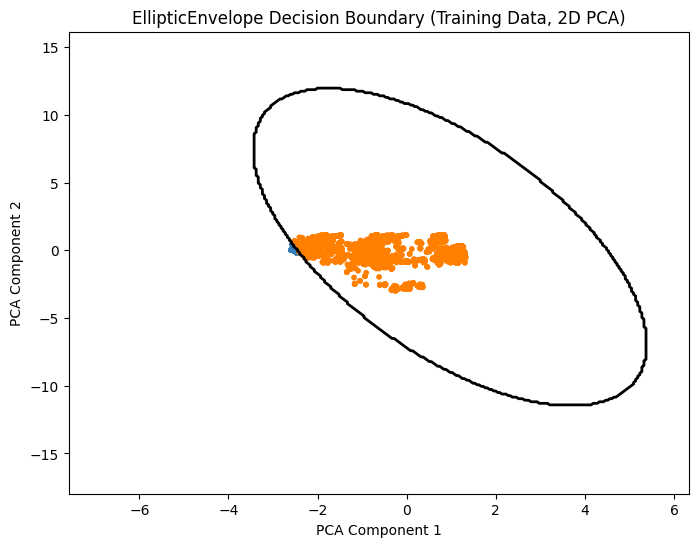

In [100]:
# Reduce features to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_sub)

# Retrain EllipticEnvelope on 2D data
clf_2d = EllipticEnvelope(contamination=outliers_fraction, random_state=42)
clf_2d.fit(X_train_2d)

# Create a meshgrid for plotting (zoomed out)
buffer_x = 5  # increase to zoom out more
buffer_y = 15  # increase to zoom out more
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:,0].min()-buffer_x, X_train_2d[:,0].max()+buffer_x, 300),
    np.linspace(X_train_2d[:,1].min()-buffer_y, X_train_2d[:,1].max()+buffer_y, 300)
)

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Plot training points
y_pred_train = clf_2d.predict(X_train_2d)
colors = np.array(["#377eb8", "#ff7f00"])  # Blue: normal, Orange: anomaly
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], s=10, color=colors[(y_pred_train + 1)//2])

# Set axis limits to match meshgrid
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("EllipticEnvelope Decision Boundary (Training Data, 2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

***Notes:***
- PCA reduces features to 2D for visualization only.
- The contour line shows the boundary of the elliptical envelope.
- Blue points are considered normal, orange points are predicted anomalies.

### Step 3: Make Predictions and Evaluate the Model

We predict outliers on the test set and evaluate performance.

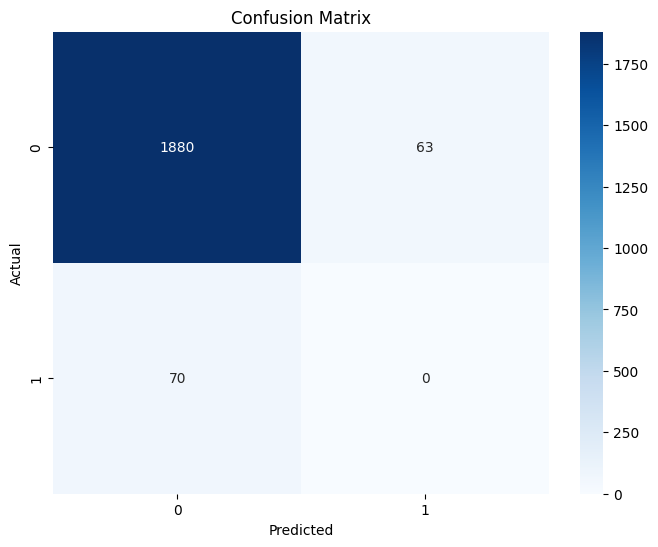

Accuracy: 93.39%


In [101]:
# Predict outliers in the test set
X_test_pca = PCA(n_components=10).fit_transform(X_test)
y_pred = clf.predict(X_test_pca)

# Convert predictions to binary format (0 = normal, 1 = anomaly)
# EllipticEnvelope outputs -1 for anomalies and 1 for normal points
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute accuracy
acc = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {acc:.2%}")


**Notes:**
- The confusion matrix shows true positives, false positives, true negatives, and false negatives.
- Some misclassifications are expected because anomalies are rare and sometimes overlap with normal data.
- PCA visualization helps see how normal and anomalous points are separated by the elliptical boundary.
- Points are colored by prediction: normal (blue) and attack (orange).

## One-Class SVM

After exploring **EllipticEnvelope**, which models normal data with a robust Gaussian assumption, we now consider a more flexible approach using **One-Class Support Vector Machines (SVM)**.  
Like EllipticEnvelope, One-Class SVM is designed for **unsupervised anomaly detection**, but instead of assuming a specific distribution, it learns a **decision boundary that encloses normal points** in a high-dimensional feature space. This makes it suitable for complex, non-linear patterns in network traffic.  

In this example, we'll continue working with the [KDDCUP99 dataset](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html).  

**Mathematical Idea:** <br>
One-Class SVM maps the data into a high-dimensional space using a kernel function, then finds the **smallest region that contains most of the data points**.  
For a dataset of $n$ points $\{x_1, ..., x_n\}$, it solves the optimization problem:

$$
\min_{\mathbf{w},\rho,\xi_i} \frac{1}{2} \|\mathbf{w}\|^2 + \frac{1}{\nu n} \sum_{i=1}^{n} \xi_i - \rho
$$

subject to:

$$
(\mathbf{w} \cdot \phi(x_i)) \ge \rho - \xi_i, \quad \xi_i \ge 0
$$

where:  

- $\phi(x_i)$: the feature mapping of $x_i$ into the kernel space  
- $\mathbf{w}$: normal vector defining the decision boundary  
- $\rho$: offset controlling the boundary  
- $\xi_i$: slack variables allowing some points to lie outside the boundary  
- $\nu \in (0,1]$: upper bound on the fraction of anomalies and lower bound on the fraction of support vectors  

**Intuition:**  

- One-Class SVM tries to **enclose the majority of normal points** while leaving anomalies outside the learned boundary.  
- The kernel function (e.g., RBF) allows the boundary to be **non-linear**, capturing complex patterns.  
- The parameter $\nu$ roughly controls the **expected fraction of outliers**.  

**Notes:**  

- Unlike EllipticEnvelope, One-Class SVM does **not assume Gaussianity**.  
- Can handle high-dimensional and non-linearly separable data.  
- Points outside the learned boundary are flagged as anomalies.  
- Requires specifying the kernel type and the $\nu$ parameter.  

We start by loading the required libraries for this lab:


### Step 4: Model Training – One-Class SVM

We use **One-Class SVM**, an unsupervised anomaly detection algorithm.  
It identifies unusual data points (potential attacks) by learning a decision boundary that encloses the majority of normal data in a high-dimensional space.


In [102]:
# Train One-Class SVM for anomaly detection
clf = OneClassSVM(kernel='rbf', nu=0.04, gamma='scale')
clf.fit(X_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,nu,0.04
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


**Notes:**
- `nu` is an upper bound on the fraction of anomalies and a lower bound on the fraction of support vectors.
- `kernel` specifies the function used to map data into a higher-dimensional space; RBF allows non-linear boundaries.
- Points outside the learned boundary are flagged as anomalies.

### Step 5: Visualize the Decision Boundary (2D PCA)

We reduce features to 2D using PCA and visualize the boundary learned by One-Class SVM.

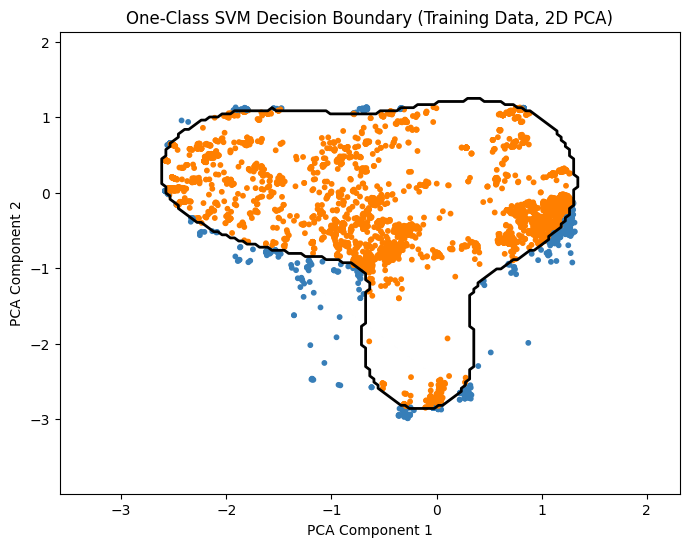

In [103]:
# Reduce features to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train)

# Retrain One-Class SVM on 2D data
clf_2d = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')
clf_2d.fit(X_train_2d)

# Create a meshgrid for plotting
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:,0].min()-1, X_train_2d[:,0].max()+1, 150),
    np.linspace(X_train_2d[:,1].min()-1, X_train_2d[:,1].max()+1, 150)
)

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Plot training points
y_pred_train = clf_2d.predict(X_train_2d)
colors = np.array(["#377eb8", "#ff7f00"])  # Blue: normal, Orange: anomaly
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], s=10, color=colors[(y_pred_train + 1)//2])

plt.title("One-Class SVM Decision Boundary (Training Data, 2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**Notes:**
- PCA reduces features to 2D for visualization only.
- The contour line shows the boundary separating normal points from anomalies.
- Blue points are predicted normal, orange points are predicted anomalies.

### Step 3: Make Predictions and Evaluate the Model
We predict outliers on the test set and evaluate performance.

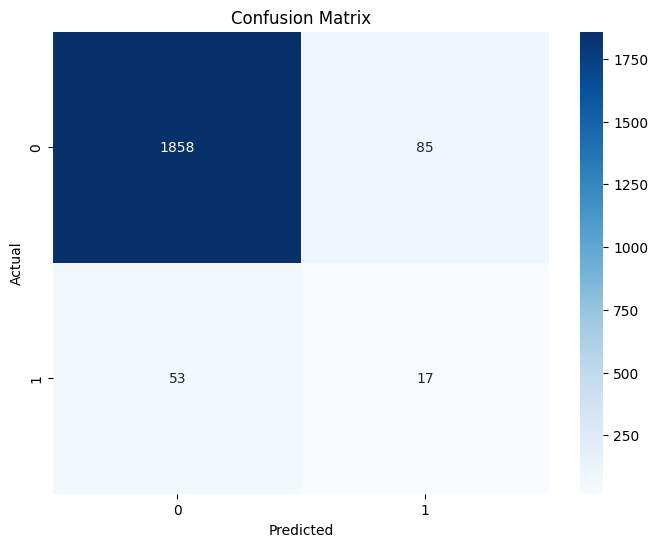

Accuracy: 93.14%


In [104]:
# Predict outliers in the test set
y_pred = clf.predict(X_test)

# Convert predictions to binary format (0 = normal, 1 = anomaly)
# One-Class SVM outputs -1 for anomalies and 1 for normal points
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute accuracy
acc = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {acc:.2%}")


**Notes:**
- The confusion matrix shows true positives, false positives, true negatives, and false negatives.
- Some misclassifications are expected because anomalies may overlap with normal data.
- PCA visualization helps see how the non-linear boundary separates normal and anomalous points.
- Points are colored by prediction: normal (blue) and attack (orange).

## Exercises – Anomaly Detection with KDDCUP99

In this exercise, we'll learn how to compare, implement, and evaluate different anomaly detection algorithms for cybersecurity using the [KDDCUP99 dataset](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html). We'll focus on Isolation Forest, EllipticEnvelope (Robust Covariance), One-Class SVM, and Local Outlier Factor (LOF).

### Exercise 1: Compare Decision Boundaries Between Anomaly Detection Algorithms
**Objective:** Understand how different algorithms separate normal points from anomalies.

**Tasks:**
1. Compare the shapes and coverage of the decision boundaries in the examples above:
   - Which algorithm produces linear vs. non-linear boundaries?
   - Which boundaries are tight around the normal points and which are more spread out?
2. **Theory Questions:**
   - Explain why the Isolation Forest boundary might look irregular compared to EllipticEnvelope.
   - Why does One-Class SVM often capture complex non-linear patterns better than Robust Covariance?
   - How does the assumption about data distribution influence the boundary shape for each algorithm?


### Exercise 2: Runtime Complexity
**Objective:** Compare the computational efficiency of different anomaly detection algorithms.

**Tasks:**
1. Measure the execution time of **training** and **prediction** for:
   - Isolation Forest
   - EllipticEnvelope
   - One-Class SVM  
   Use the Python `time` module or `%timeit` magic in Jupyter. Implement this directly in the code sections of the examples above.
2. Discuss:
   - Which algorithm is fastest during training? During testing? Explain why.

### Exercise 3: Implement Local Outlier Factor (LOF) for Anomaly Detection
**Objective:** Apply a density-based anomaly detection algorithm to network traffic data.

**Background:**  
In Tutorial 1, we encountered the density-based clustering algorithm **DBSCAN**. In this exercise, we will implement an anomaly detection algorithm based on a similar density principle: the **Local Outlier Factor (LOF)**. LOF identifies anomalies by comparing the local density of a point to the densities of its neighbors.  

**Resources:**  
- [Local Outlier Factor (LOF) Wikipedia](https://en.wikipedia.org/wiki/Local_outlier_factor)  
- [scikit-learn LocalOutlierFactor class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)  

In [105]:
# Tasks:
# 1. Load and preprocess the KDDCUP99 dataset as in the examples.
# 2. Train a LocalOutlierFactor model using only normal points.
# 3. Predict anomalies on the test set.
# 4. Visualize the decision boundary using 2D PCA.
# 5. Visualize the results a confusion matrix.
# 6. Compare the LOF results with those obtained from:
#    - Isolation Forest
#    - EllipticEnvelope
#    - One-Class SVM
# 6. Theory Questions:
#    - How does LOF differ from Isolation Forest in identifying anomalies?
#    - Why is LOF considered a density-based method rather than a boundary-based method?
#    - What are the strengths and limitations of LOF for intrusion detection in cybersecurity?


## Conclusion

In this tutorial, we explored how classic machine learning techniques can be used to detect anomalies in network traffic, a critical task in cybersecurity where labeled attack data are scarce. By applying algorithms such as Isolation Forest, EllipticEnvelope, One-Class SVM, and Local Outlier Factor to the KDDCUP99 dataset, we gained practical insights into how different models identify unusual behavior in network data.

Isolation Forest efficiently isolates anomalies without explicitly modeling normal data, making it well-suited for high-volume traffic where attacks are rare and diverse. EllipticEnvelope, on the other hand, constructs a robust statistical representation of normal behavior and flags deviations as potential threats. However, it is computationally expensive, particularly in high-dimensional datasets, which can limit scalability. One-Class SVM demonstrates the power of non-linear boundaries in high-dimensional feature spaces, capturing complex patterns that other methods may overlook. LOF, as a density-based method, emphasizes local context by identifying points that deviate from the density of their immediate neighborhood rather than from a global model of normality.

Through visualization, evaluation, and runtime analysis, we observed how algorithmic assumptions impact both detection performance and computational feasibility. Anomaly detection provides insight into previously unseen or evolving cyber threats, enabling early intervention and complementing traditional signature-based systems. This tutorial illustrates that a deep understanding of both the data and the strengths and limitations of different algorithms is essential for designing robust intrusion detection strategies that proactively anticipate attacks rather than merely reacting to them.

**For practical implementation of ML-based anomaly detection methods, we must ask critical questions:** How often do zero-day attacks occur that cannot be captured by signature-based systems? What is the volume of network traffic, and which algorithm can handle this amount of data efficiently? What is the cost of false positives to the organization? What is the cost of false negatives? How can we handle this balance?

---

[![Star our repository](https://img.shields.io/static/v1.svg?logo=star&label=⭐&message=Star%20Our%20Repository&color=yellow)](https://github.com/clandolt/mlcysec_notebooks/)  If you found this tutorial helpful, please **⭐ star our repository** to show your support.   
[![Ask questions](https://img.shields.io/static/v1.svg?logo=star&label=❔&message=Ask%20Questions&color=9cf)](https://github.com/clandolt/mlcysec_notebooks/issues)  For any **questions**, **typos**, or **bugs**, kindly open an issue on GitHub — we appreciate your feedback!

---